<a href="https://colab.research.google.com/github/Dorsaf-A/Algorithme_practice/blob/master/DDRCFJSSP_final_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyinterval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#**Solving job shop scheduling problem by NSGA-II algorithm in python**

In [ ]:
import pandas as pd
import numpy as np
import time
import copy
import random
from interval import interval, inf, imath
import math
import plotly.express as px
import plotly as py
import plotly.figure_factory as ff
import datetime
import matplotlib.pyplot as plt
import itertools
import matplotlib.colors as colors
import statistics as sts
import sys 


#initialization setting

In [ ]:
mat_adj=pd.read_excel("/content/sample_data/exemple.xlsx",sheet_name="Machines Sequence",index_col =[0])
pt_tmp=pd.read_excel("/content/sample_data/exemple.xlsx",sheet_name="Processing Time",index_col =[0])
job_priority_duedate_tmp=pd.read_excel("/content/sample_data/exemple.xlsx",sheet_name="Priority and Due date",index_col =[0])
num_op = len(pt_tmp.axes[0])
num_job = len(job_priority_duedate_tmp.axes[0])
num_mc = len(pt_tmp.axes[1])

print(num_op, num_job , num_mc)
print(pt_tmp)
print(mat_adj)
job_priority_duedate_tmp


11 4 5
       M1  M2  M3  M4  M5
order                    
J1      3   5   0   0   0
J1      0   0   0   0   4
J1      0   0   4   6   0
J2      0   0   0   0  10
J2      5   7   0   0   0
J2      0   0   6   8   0
J3      0   0   7   9   0
J3      0   0   0   0   6
J4      6  10   0   0   0
J4      0   0   0   0   5
J4      0   0   7   8   0
       M1  M2  M3  M4  M5
order                    
J1      1   1   0   0   0
J1      0   0   0   0   1
J1      0   0   1   1   0
J2      0   0   0   0   1
J2      1   1   0   0   0
J2      0   0   1   1   0
J3      0   0   1   1   0
J3      0   0   0   0   1
J4      1   1   0   0   0
J4      0   0   0   0   1
J4      0   0   1   1   0


,priority,due date
order,,
J1,0.24,20
J2,0.20,35
J3,0.30,40
J4,0.15,55


In [ ]:
pt=[list(map(int, pt_tmp.iloc[i])) for i in range(num_op)]
job_op=mat_adj.pivot_table(columns='order',aggfunc='size')
job_op_list=[job_op.iloc[i] for i in range(num_job)]
ma=[list(map(int, mat_adj.iloc[i])) for i in range(num_op)]
job_priority_duedate=[list(job_priority_duedate_tmp.iloc[i]) for i in range(num_job)]
start_time = time.time()
job_machine=[[] for i in range(num_op)]
for i in range(num_op):
  for j in range(num_mc):
    if ma[i][j] != 0:
      job_machine[i].append(j+1)
pt,job_priority_duedate,job_op,job_machine,job_op_list

([[3, 5, 0, 0, 0],
  [0, 0, 0, 0, 4],
  [0, 0, 4, 6, 0],
  [0, 0, 0, 0, 10],
  [5, 7, 0, 0, 0],
  [0, 0, 6, 8, 0],
  [0, 0, 7, 9, 0],
  [0, 0, 0, 0, 6],
  [6, 10, 0, 0, 0],
  [0, 0, 0, 0, 5],
  [0, 0, 7, 8, 0]],
 [[0.24, 20.0], [0.2, 35.0], [0.3, 40.0], [0.15, 55.0]],
 order
 J1      3
 J2      3
 J3      2
 J4      3
 dtype: int64,
 [[1, 2], [5], [3, 4], [5], [1, 2], [3, 4], [3, 4], [5], [1, 2], [5], [3, 4]],
 [3, 3, 2, 3])

In [ ]:
processing_difficulty = []
recovery_rate = []
for i in range(num_mc) : 
  processing_difficulty.append(round(random.uniform(0.01,0.1),2))
  recovery_rate.append(round(random.uniform(0.1,0.5),2))


C = 0.2    # C is for error calibration.
difficulty_rate = round(random.uniform(0.01,0.5),2)


# raw_input is used in python 2
population_size=int(input('Please input the size of population: ') or 70) # default value is 70
crossover_rate=float(input('Please input the size of Crossover Rate: ') or 0.7) # default value is 0.7
mutation_rate=float(input('Please input the size of Mutation Rate: ') or 0.2) # default value is 0.2
mutation_selection_rate=float(input('Please input the mutation selection rate: ') or 0.5)
num_mutation_jobs=round(num_op*mutation_selection_rate)
num_iteration=int(input('Please input number of iteration: ') or 200) # default value is 200


Please input the size of population: 70
Please input the size of Crossover Rate: 0.7
Please input the size of Mutation Rate: 0.2
Please input the mutation selection rate: 0.5
Please input number of iteration: 200


#non-dominated sorting function

In [ ]:
def non_dominated_sorting(population_size,chroms_obj_record):
    s,n={},{}
    front,rank={},{}
    front[0]=[]     
    for p in range(population_size+len(offspring_list)):
        s[p]=[]
        n[p]=0
        for q in range(population_size+len(offspring_list)):
            
            if ((chroms_obj_record[p][0]<chroms_obj_record[q][0] and chroms_obj_record[p][1]<chroms_obj_record[q][1]) or (chroms_obj_record[p][0]<=chroms_obj_record[q][0] and chroms_obj_record[p][1]<chroms_obj_record[q][1])
            or (chroms_obj_record[p][0]<chroms_obj_record[q][0] and chroms_obj_record[p][1]<=chroms_obj_record[q][1])):
                if q not in s[p]:
                    s[p].append(q)
            elif ((chroms_obj_record[p][0]>chroms_obj_record[q][0] and chroms_obj_record[p][1]>chroms_obj_record[q][1]) or (chroms_obj_record[p][0]>=chroms_obj_record[q][0] and chroms_obj_record[p][1]>chroms_obj_record[q][1])
            or (chroms_obj_record[p][0]>chroms_obj_record[q][0] and chroms_obj_record[p][1]>=chroms_obj_record[q][1])):
                n[p]=n[p]+1
        if n[p]==0:
            rank[p]=0
            if p not in front[0]:
                front[0].append(p)
    
    i=0
    while (front[i]!=[]):
        Q=[]
        for p in front[i]:
            for q in s[p]:
                n[q]=n[q]-1
                if n[q]==0:
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
        i=i+1
        front[i]=Q
                
    del front[len(front)-1]
    return front

#calculate crowding distance function

In [ ]:
def calculate_crowding_distance(front,chroms_obj_record):
    
    distance={m:0 for m in front}
    for o in range(2):
        obj={m:chroms_obj_record[m][o] for m in front}
        sorted_keys=sorted(obj, key=obj.get)
        distance[sorted_keys[0]]=distance[sorted_keys[len(front)-1]]=999999999999
        #distance[sorted_keys[0]]=distance[sorted_keys[len(front)-1]]
        for i in range(1,len(front)-1):
            if len(set(obj.values()))==1:
                distance[sorted_keys[i]]=distance[sorted_keys[i]]
            else:
                distance[sorted_keys[i]]=distance[sorted_keys[i]]+(obj[sorted_keys[i+1]]-obj[sorted_keys[i-1]])/(obj[sorted_keys[len(front)-1]]-obj[sorted_keys[0]])
            
    return distance 

#selection

In [ ]:
def selection(population_size,front,chroms_obj_record,total_chromosome):   
    N=0
    new_pop=[]
    while N < population_size:
        for i in range(len(front)):
            N=N+len(front[i])
            if N > population_size:
                distance=calculate_crowding_distance(front[i],chroms_obj_record)
                sorted_cdf=sorted(distance, key=distance.get)
                sorted_cdf.reverse()
                for j in sorted_cdf:
                    if len(new_pop)==population_size:
                        break                
                    new_pop.append(j)              
                break
            else:
                new_pop.extend(front[i])
    
    population_list=[]
    for n in new_pop:
        population_list.append(total_chromosome[n])
    
    return population_list,new_pop

# **Main code**

In [ ]:
'''----- generate initial population -----'''
best_list,best_obj,best_record=[],[],[]
population_list=[]
operation_seq_list=[]
machine_seq_list=[]
job_op_cumul=[]
a=0
for j in range(len(job_op)):
  a+=job_op[j]
  job_op_cumul.append(a)
  

for i in range(population_size):
    nxm_random_num=list(np.random.permutation(num_op)+1) # generate a random permutation of 1 to num_op
    population_list.append(nxm_random_num) # add to the population_list
    for j in range(num_op):
      for k in range(num_job) :
        if population_list[i][j] <= job_op_cumul[k]:
           population_list[i][j]=k+1 # convert to job number format, every job appears m times
           break
        
print(population_list)
job_op_cumul,k

[[1, 4, 4, 2, 1, 2, 3, 2, 4, 3, 1], [1, 2, 1, 2, 4, 4, 4, 2, 3, 1, 3], [1, 4, 2, 2, 1, 1, 3, 4, 3, 2, 4], [1, 1, 2, 4, 4, 3, 2, 3, 1, 2, 4], [2, 4, 3, 4, 2, 4, 1, 3, 1, 1, 2], [3, 4, 4, 2, 4, 3, 1, 2, 2, 1, 1], [1, 4, 3, 1, 4, 4, 2, 1, 2, 2, 3], [4, 3, 2, 3, 1, 2, 4, 4, 1, 2, 1], [4, 2, 4, 3, 1, 1, 2, 3, 4, 1, 2], [4, 2, 1, 1, 3, 4, 1, 2, 4, 3, 2], [2, 2, 1, 3, 2, 4, 4, 1, 3, 4, 1], [4, 3, 2, 4, 2, 2, 1, 1, 3, 4, 1], [4, 1, 2, 3, 4, 2, 2, 1, 4, 3, 1], [3, 2, 2, 4, 4, 1, 1, 4, 2, 1, 3], [4, 1, 3, 2, 1, 4, 1, 2, 2, 4, 3], [4, 4, 3, 2, 2, 3, 2, 1, 1, 1, 4], [1, 2, 2, 3, 1, 4, 3, 4, 4, 2, 1], [4, 1, 4, 3, 2, 4, 3, 1, 1, 2, 2], [4, 3, 2, 2, 1, 1, 1, 2, 3, 4, 4], [2, 4, 4, 3, 1, 1, 3, 1, 2, 2, 4], [4, 3, 4, 2, 4, 2, 3, 1, 1, 2, 1], [1, 3, 1, 2, 4, 4, 4, 2, 1, 3, 2], [2, 1, 4, 2, 3, 3, 4, 1, 1, 4, 2], [3, 3, 2, 2, 1, 4, 1, 4, 2, 1, 4], [4, 4, 3, 4, 2, 1, 2, 1, 1, 3, 2], [4, 4, 2, 2, 1, 1, 2, 4, 3, 3, 1], [2, 2, 4, 4, 1, 3, 2, 1, 1, 4, 3], [1, 1, 4, 1, 2, 3, 2, 4, 4, 3, 2], [3, 2, 4, 4, 1, 3, 

([3, 6, 8, 11], 2)

In [ ]:
def job(op_num):
  for i in range(num_job) :
    if op_num <= job_op_cumul[i]:
      return i


In [ ]:
"la fonction chromosome_operation_machine_seq qui retourne la sequence des opérations et la sequence des machines"
def chromosome_operation_machine_seq(l):
  op_list=[list() for _ in range(num_op)]
  machine_list=[list() for _ in range(num_op)]
  n=1
  for i in range(num_job):
    k=l.count(i+1)
    m=0
    for j in range(k):
      s=l.index(i+1,m)
      op_list[s]= n
      machine_list[s]=random.choice(job_machine[n-1])
      m=l.index(i+1,s)+1
      n+=1
  return op_list,machine_list
    


In [ ]:
def job_record (x):
  o_keys=[j for j in range(num_op)]
  j_keys=[j for j in range(num_job)]
  key_count={key:0 for key in o_keys}
  j_count={key:0 for key in j_keys}
  m_keys=[j+1 for j in range(num_mc)]
  m_count={key:0 for key in m_keys}
  j_record={}
  
# print(best_list[0])
  ch=chromosome_operation_machine_seq(x)
# print(ch)
  for i in range(len(x)):
            gen_m=ch[1][i]         
            gen_t=int(pt[ch[0][i]-1][gen_m-1])
            j_count[x[i]-1]=j_count[x[i]-1]+gen_t
            m_count[gen_m]=m_count[gen_m]+gen_t

            
            # print(gen_t,gen_m)
            # print(j_count,m_count)
            if m_count[gen_m]<j_count[x[i]-1]:
                m_count[gen_m]=j_count[x[i]-1]
            elif m_count[gen_m]>j_count[x[i]-1]:
                j_count[x[i]-1]=m_count[gen_m]

            start=j_count[x[i]-1]-gen_t
            j_record[(x[i],gen_m)] = [start,j_count[x[i]-1]]
  return j_record

[[1, 2, 4, 1, 1, 3, 4, 4, 2, 2, 3], [2, 1, 1, 1, 2, 4, 3, 4, 2, 4, 3], [2, 1, 4, 1, 3, 4, 1, 4, 2, 2, 3], [2, 1, 1, 1, 2, 4, 3, 4, 2, 4, 3], [1, 2, 1, 1, 2, 3, 4, 4, 2, 4, 3], [2, 1, 1, 1, 2, 3, 4, 4, 2, 4, 3], [2, 1, 1, 1, 2, 4, 3, 4, 2, 4, 3], [1, 2, 4, 1, 1, 3, 4, 4, 2, 2, 3], [4, 1, 1, 1, 2, 4, 3, 4, 2, 2, 3], [1, 2, 1, 1, 2, 4, 3, 4, 2, 4, 3], [1, 2, 1, 1, 2, 3, 4, 4, 2, 4, 3], [1, 2, 1, 1, 2, 4, 3, 4, 2, 4, 3], [2, 1, 1, 1, 2, 3, 4, 4, 2, 4, 3], [2, 1, 1, 1, 2, 3, 4, 4, 2, 4, 3], [2, 1, 1, 1, 2, 3, 4, 4, 2, 4, 3], [2, 1, 1, 1, 2, 4, 3, 4, 2, 4, 3], [1, 2, 1, 1, 2, 3, 4, 4, 2, 4, 3], [4, 2, 1, 1, 2, 3, 4, 2, 1, 4, 3], [1, 2, 1, 1, 2, 3, 4, 4, 2, 4, 3], [1, 2, 1, 1, 2, 3, 4, 4, 2, 4, 3], [1, 2, 1, 1, 2, 3, 4, 4, 2, 4, 3], [2, 1, 1, 1, 2, 3, 4, 4, 2, 4, 3], [1, 2, 1, 1, 2, 3, 4, 4, 2, 4, 3], [1, 2, 1, 1, 2, 3, 4, 4, 2, 4, 3], [2, 1, 1, 1, 2, 3, 4, 4, 2, 4, 3], [2, 1, 1, 1, 2, 3, 4, 4, 2, 4, 3], [1, 2, 1, 1, 2, 3, 4, 4, 2, 4, 3], [1, 2, 1, 1, 2, 3, 4, 4, 2, 4, 3], [3, 1, 2, 1, 2, 4, 

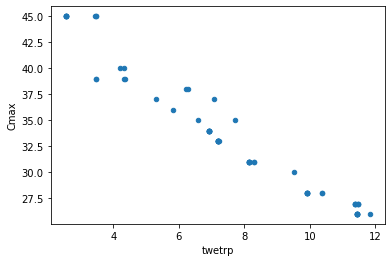

In [ ]:
for n in range(num_iteration):
    #print('Iteration :',n)           
    '''-------- two point crossover --------'''
    parent_list=copy.deepcopy(population_list)
    offspring_list=[]
    S=list(np.random.permutation(population_size)) # generate a random sequence to select the parent chromosome to crossover
    
    for m in range(int(population_size/2)):
      crossover_prob=np.random.rand()
      if crossover_rate >= crossover_prob: 
        parent_1= population_list[S[2*m]][:]
        parent_2= population_list[S[2*m+1]][:]
        child_1=parent_1[:]
        child_2=parent_2[:]
        
        cutpoint=list(np.random.choice(num_op, 2, replace=False))
        cutpoint.sort()
    
        child_1[cutpoint[0]:cutpoint[1]]=parent_2[cutpoint[0]:cutpoint[1]]
        child_2[cutpoint[0]:cutpoint[1]]=parent_1[cutpoint[0]:cutpoint[1]]
        
        offspring_list.extend((child_1,child_2)) # append child chromosome to offspring list
    '''----------repairment-------------'''
    for m in range(len(offspring_list)):
      job_count={}
      larger,less=[],[] # 'larger' record jobs appear in the chromosome more than m times, and 'less' records less than m times.
      for i in range(num_job):
         if i+1 in offspring_list[m]:
              count=offspring_list[m].count(i+1)
              pos=offspring_list[m].index(i+1)
              job_count[i+1]=[count,pos] # store the above two values to the job_count dictionary
         else:
              count=0
              job_count[i+1]=[count,0]
         if count>job_op_list[i]:
              larger.append(i+1)
         elif count<job_op_list[i]:
              less.append(i+1)
      # print(offspring_list[m],job_count,larger,less)    
      for k in range(len(larger)):
          chg_job=larger[k]
          # print(job_op_list)
          while job_count[chg_job][0]>job_op_list[chg_job-1]:
            for d in range(len(less)):
              if job_count[less[d]][0]<job_op_list[less[d]-1]:                    
                offspring_list[m][job_count[chg_job][1]]=less[d]
                job_count[chg_job][1]=offspring_list[m].index(chg_job)
                job_count[chg_job][0]=job_count[chg_job][0]-1
                job_count[less[d]][0]=job_count[less[d]][0]+1                    
              if job_count[chg_job][0]==job_op_list[chg_job-1]:
                break
        
    
    '''--------mutation--------'''   
    for m in range(len(offspring_list)):
        mutation_prob=np.random.rand()
        if mutation_rate >= mutation_prob:
            m_chg=list(np.random.choice(num_op, num_mutation_jobs, replace=False)) # chooses the position to mutation
            t_value_last=offspring_list[m][m_chg[0]] # save the value which is on the first mutation position
            for i in range(num_mutation_jobs-1):
                offspring_list[m][m_chg[i]]=offspring_list[m][m_chg[i+1]] # displacement
            
            offspring_list[m][m_chg[num_mutation_jobs-1]]=t_value_last # move the value of the first mutation position to the last mutation position   
                        
    
    '''--------fitness value(calculate  makespan and TWETRP)-------------'''
    total_chromosome=copy.deepcopy(parent_list)+copy.deepcopy(offspring_list) # combine parent and offspring chromosomes
    chroms_obj_record={} # record each chromosome objective values as chromosome_obj_record={chromosome:[TWET,makespan]}
    total_record={}
    for m in range(population_size+len(offspring_list)):
      d_record={}
      o_keys=[j for j in range(num_op)]
      j_keys=[j for j in range(num_job)]
      key_count={key:0 for key in o_keys}
      j_count={key:0 for key in j_keys}
      m_keys=[j+1 for j in range(num_mc)]
      m_count={key:0 for key in m_keys}
      j_record={}
      
  

      ch=chromosome_operation_machine_seq(total_chromosome[m])

      for i in range(len(total_chromosome[m])):
            gen_m=ch[1][i]         
            gen_t=int(pt[ch[0][i]-1][gen_m-1])
            j_count[total_chromosome[m][i]-1]=j_count[total_chromosome[m][i]-1]+gen_t
            m_count[gen_m]=m_count[gen_m]+gen_t

            
            # print(gen_t,gen_m)
            # print(j_count,m_count)
            if m_count[gen_m]<j_count[total_chromosome[m][i]-1]:
                m_count[gen_m]=j_count[total_chromosome[m][i]-1]
            elif m_count[gen_m]>j_count[total_chromosome[m][i]-1]:
                j_count[total_chromosome[m][i]-1]=m_count[gen_m]

            start=j_count[total_chromosome[m][i]-1]-gen_t
            start_time=str(datetime.timedelta(seconds=start)) # convert seconds to hours, minutes and seconds
            end_time=str(datetime.timedelta(seconds=j_count[total_chromosome[m][i]-1])) 
            j_record[(total_chromosome[m][i],gen_m)] = [start,j_count[total_chromosome[m][i]-1]]

      total_record[m]=j_record


      for j in j_keys:
            if j_count[j]>job_priority_duedate[j][1]:
                job_tardiness=j_count[j]-job_priority_duedate[j][1]
                job_earliness=0
                d_record[j]=[job_earliness,job_tardiness]
            elif j_count[j]<job_priority_duedate[j][1]:
                job_tardiness=0
                job_earliness=job_priority_duedate[j][1]-j_count[j]
                d_record[j]=[job_earliness,job_tardiness]
            else:
                job_tardiness=0
                job_earliness=0
                d_record[j]=[job_earliness,job_tardiness]
      W = []
      F =[[]]
      r = []
      key_record=list(j_record)
      j_record_tot={}
      for i in range(num_job):
        for j in range(num_mc):
          if (i+1,j+1) in key_record:
            j_record_tot[(i+1,j+1)]=[j_record[(i+1,j+1)][0],j_record[(i+1,j+1)][1]]
          else:
            j_record_tot[(i+1,j+1)]=[0,0]

        
      for k in range(num_mc) :
            W.append(interval.union(interval(j_record_tot[(u+1,k+1)]) for u in range(num_job-1)))
            F.append([])
            r.append([])
            F[k].append([0,0])
            for i in range(m_count[k+1]):  
              if i in W[k] : 
                 FR=round(1-(1-F[k][i][1])*math.exp(-processing_difficulty[k]),2)
                 F[k].append([i,FR]) 
              else: 
                 RR=round(F[k][i][1]*math.exp(-recovery_rate[k]),2)
                 F[k].append([i,RR])
            r[k] = C * ((F[k][m_count[k+1]][1])**difficulty_rate)
    
               
      

        #print(j_count[0])
      #twet=sum((1/(job_priority_duedate[j][0]))*d_record[j][0]+job_priority_duedate[j][0]*d_record[j][1] for j in j_keys)
      twet=sum((job_priority_duedate[j][0])*(d_record[j][1] + d_record[j][0]) for j in j_keys)
      priority_mean=sts.mean(job_priority_duedate[j][0] for j in j_keys)
      twetrp=twet + sum( (priority_mean * r[k]) for k in range(num_mc))
      makespan=max(j_count.values())
        # chroms_obj_record[m]=[twet,makespan]
      chroms_obj_record[m]=[twetrp,makespan]
    #print('Iteration %d' %n ,d_record)
    # print('iteration %d' %n)
    # print('Fatigue',F[k])
    # print('W', W)                  
    
    '''-------non dominated sorting-------'''      
    front=non_dominated_sorting(population_size,chroms_obj_record)
        
    '''----------selection----------'''
    population_list,new_pop=selection(population_size,front,chroms_obj_record,total_chromosome)
    new_pop_obj=[chroms_obj_record[k] for k in new_pop] 
    new_pop_record=[total_record[k] for k in new_pop]   
    

    '''----------comparison----------'''
    if n==0:
        best_list=copy.deepcopy(population_list)
        best_obj=copy.deepcopy(new_pop_obj)
        best_record=copy.deepcopy(new_pop_record)
    else:            
        total_list=copy.deepcopy(population_list)+copy.deepcopy(best_list)
        total_obj=copy.deepcopy(new_pop_obj)+copy.deepcopy(best_obj)
        total_best_record=copy.deepcopy(new_pop_record)+copy.deepcopy(best_record)
        
        now_best_front=non_dominated_sorting(population_size,total_obj)
        best_list,best_pop=selection(population_size,now_best_front,total_obj,total_list)
        best_obj=[total_obj[k] for k in best_pop]
        best_record=[total_best_record[k] for k in best_pop]

'''----------result----------'''
print(best_list)
print(best_obj)
print(best_record)
# print('the elapsed time:%s'% (time.time() - start_time))

df = pd.DataFrame(best_obj,columns=['twetrp','Cmax'])
df.plot.scatter(x='twetrp', y='Cmax')



### Take the first solution to draw the schedule Gantt chart


In [ ]:
'''--------plot gantt chart-------'''
import pandas as pd
import plotly as py
import plotly.figure_factory as ff
import datetime
import matplotlib.pyplot as plt
import itertools
import matplotlib.colors as colors

JR=best_record[0]
print(JR)
print(best_list[0])

# JR=total_record[0]
# print(JR)
key_record=list(JR)
print(key_record)
j_record_tot={}
for i in range(num_job):
  for j in range(num_mc):
    if (i+1,j+1) in key_record:
      j_record_tot[(i+1,j+1)]=[str(datetime.timedelta(seconds=JR[(i+1,j+1)][0])),str(datetime.timedelta(seconds=JR[(i+1,j+1)][1]))]
    else:
      j_record_tot[(i+1,j+1)]=['0:00:00','0:00:00']

print(j_record_tot)      
color_list  = [colors.to_rgba(c)
                   for c in plt.rcParams['axes.prop_cycle'].by_key()['color']]
res = [(random.random(),random.random(),random.random(),random.random()) for i in range(num_job)]
color_list.extend(res)
#print(color_list)
df=[]
for m in m_keys:
    for j in j_keys:
        df.append(dict(Task='Machine %s'%(m), Start='2022-06-03 %s'%(str(j_record_tot[(j+1,m)][0])), Finish='2022-06-03 %s'%(str(j_record_tot[(j+1,m)][1])),Resource='Job %s'%(j+1)))
        #df.append(dict(Task='Machine %s'%(m), Start=str(j_record[(j,m)][0]), Finish=str(j_record[(j,m)][1]),Resource='Job %s'%(j+1)))

#print(best_obj[0])    
fig = ff.create_gantt(df, colors=color_list ,index_col='Resource', show_colorbar=True, group_tasks=True, showgrid_x=True, title='Job shop Schedule')
fig
#df
#j_record
#py.iplot(fig, filename='GA_job_shop_scheduling1', world_readable=True)

{(1, 2): [0, 5], (2, 5): [0, 10], (4, 1): [0, 6], (1, 5): [10, 14], (1, 4): [14, 20], (3, 4): [20, 29], (4, 5): [14, 19], (4, 3): [19, 26], (2, 1): [10, 15], (2, 3): [26, 32], (3, 5): [29, 35]}
[1, 2, 4, 1, 1, 3, 4, 4, 2, 2, 3]
[(1, 2), (2, 5), (4, 1), (1, 5), (1, 4), (3, 4), (4, 5), (4, 3), (2, 1), (2, 3), (3, 5)]
{(1, 1): ['0:00:00', '0:00:00'], (1, 2): ['0:00:00', '0:00:05'], (1, 3): ['0:00:00', '0:00:00'], (1, 4): ['0:00:14', '0:00:20'], (1, 5): ['0:00:10', '0:00:14'], (2, 1): ['0:00:10', '0:00:15'], (2, 2): ['0:00:00', '0:00:00'], (2, 3): ['0:00:26', '0:00:32'], (2, 4): ['0:00:00', '0:00:00'], (2, 5): ['0:00:00', '0:00:10'], (3, 1): ['0:00:00', '0:00:00'], (3, 2): ['0:00:00', '0:00:00'], (3, 3): ['0:00:00', '0:00:00'], (3, 4): ['0:00:20', '0:00:29'], (3, 5): ['0:00:29', '0:00:35'], (4, 1): ['0:00:00', '0:00:06'], (4, 2): ['0:00:00', '0:00:00'], (4, 3): ['0:00:19', '0:00:26'], (4, 4): ['0:00:00', '0:00:00'], (4, 5): ['0:00:14', '0:00:19']}


Please input the chosen solution: 0
[(1, 2), (2, 5), (4, 1), (1, 5), (1, 4), (3, 4), (4, 5), (4, 3), (2, 1), (2, 3), (3, 5)]
[1, 2, 4, 1, 1, 3, 4, 4, 2, 2, 3]
{(1, 2): [0, 5], (2, 5): [0, 10], (4, 1): [0, 6], (1, 5): [10, 14], (1, 4): [14, 20], (3, 4): [20, 29], (4, 5): [14, 19], (4, 3): [19, 26], (2, 1): [10, 15], (2, 3): [26, 32], (3, 5): [29, 35]}
{(1, 1): [0, 0], (1, 2): [0, 5], (1, 3): [0, 0], (1, 4): [14, 20], (1, 5): [10, 14], (2, 1): [10, 15], (2, 2): [0, 0], (2, 3): [26, 32], (2, 4): [0, 0], (2, 5): [0, 10], (3, 1): [0, 0], (3, 2): [0, 0], (3, 3): [0, 0], (3, 4): [20, 29], (3, 5): [29, 35], (4, 1): [0, 6], (4, 2): [0, 0], (4, 3): [19, 26], (4, 4): [0, 0], (4, 5): [14, 19]}
35


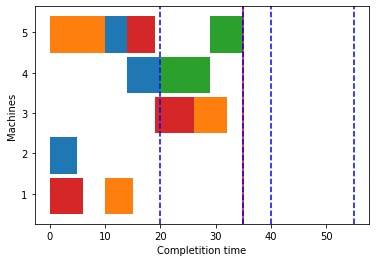

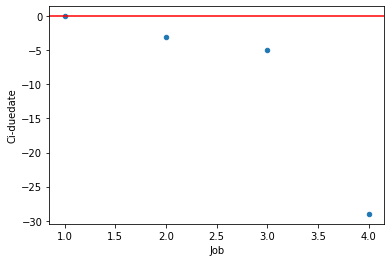

In [ ]:
sol = int(input('Please input the chosen solution: '))


# Declaring a figure "gnt"
fig, gnt = plt.subplots()
 
# Setting labels for x-axis and y-axis
gnt.set_xlabel('Completition time')
gnt.set_ylabel('Machines')
 
# Setting ticks on y-axis
gnt.set_yticks([10*(i+1)+5 for i in range(50)])
# Labelling tickes of y-axis
gnt.set_yticklabels([str(a+1) for a in range(50)])


# Setting graph attribute
# gnt.grid(True)

 
color_list  = [colors.to_rgba(c)
                   for c in plt.rcParams['axes.prop_cycle'].by_key()['color']]
res = [(random.random(),random.random(),random.random(),random.random()) for i in range(num_job)]
color_list.extend(res)

JR=best_record[sol]
key_record=list(JR)
print(key_record)
j_record_tot={}
for i in range(num_job):
  for j in range(num_mc):
    if (i+1,j+1) in key_record:
      j_record_tot[(i+1,j+1)]=JR[(i+1,j+1)]
    else:
      j_record_tot[(i+1,j+1)]=[0,0]

    # print(j_record_tot)
    '''i = job \\ gen_m = machine '''
    
    gnt.broken_barh([(j_record_tot[(i+1,j+1)][0], j_record_tot[(i+1,j+1)][1]-j_record_tot[(i+1,j+1)][0])], (10*(j+1),9), facecolors =(color_list[i]),data='Job 1')
print(best_list[sol])
print(JR)
print(j_record_tot)
plt.savefig("gantt1.png")
# plt.figlegend(['Job %d'%(i+1) for i in range(num_job)],loc='up')
#plt.legend(['Job %d'%(i+1) for i in range(num_job)])
plt.axvline(x=best_obj[sol][1],color='red')
record = []
'''----record represent Ci----'''
for i in range(num_job):
  plt.axvline(x=job_priority_duedate[i][1],color='blue',linestyle='--')
  # plt.axvline(x=j_count[i],color='red',linestyle='--')
  cjob=max(j_record_tot[(i+1,j+1)][1] for j in range(num_mc))
  record.append([i+1, cjob -job_priority_duedate[i][1]])
print(best_obj[sol][1])
df1 = pd.DataFrame(record,columns=['Job','Ci-duedate'])
plt1 = df1.plot.scatter(x='Job', y='Ci-duedate')
plt1.axhline(y=0,color='red')

 

#Fatigue plot per machine


In [ ]:
from interval import interval, inf, imath
import math
import plotly.express as px

# processing_difficulty = round(random.uniform(0.01,0.1),2)
# recovery_rate = round(random.uniform(0.1,0.5),2)

sol = int(input('Please input the chosen solution: '))

JR=best_record[sol]
key_record=list(JR)
print(key_record)
j_record_tot={}
for i in range(num_job):
  for j in range(num_mc):
    if (i+1,j+1) in key_record:
      j_record_tot[(i+1,j+1)]=JR[(i+1,j+1)]
    else:
      j_record_tot[(i+1,j+1)]=[0,0]

W=[]      
F = [[]]
r = [[]]
# for i in range(num_mc) : F.append([])

for k in range(num_mc) :
  W.append(interval.union(interval(j_record_tot[(u+1,k+1)]) for u in range(num_job)))
  # print(JR)
  # print(W)
  F.append([])
  r.append([])
  F[k].append([0,0])
  for i in range(best_obj[sol][1]):  
    if i in W[k] : 
      FR=round(1-(1-F[k][i][1])*math.exp(-processing_difficulty[k]),2)
      F[k].append([i,FR]) 
    else: 
      RR=round(F[k][i][1]*math.exp(-recovery_rate[k]),2)
      F[k].append([i,RR])
    rp = C * ((F[k][i][1])**difficulty_rate)
    r[k].append([i,rp])
  Fatigue = pd.DataFrame(F[k],columns=['time','fatigue'])
  rejected_pieces = pd.DataFrame(r[k],columns=['time','rejected pieces'])
# Fatigue.plot.scatter(x='time', y='fatigue')

  fig = px.line(Fatigue, x='time', y='fatigue', title="Fatigue rate for worker %d" %(k+1)) 
  fig1 = px.line(rejected_pieces, x='time', y='rejected pieces', title="Rejected pieces per worker %d" %(k+1)) 
  fig.show()
  fig1.show()

  print(W[k])

# Fatigue = pd.DataFrame(F,columns=['time','fatigue'])
# # Fatigue.plot.scatter(x='time', y='fatigue')

# fig = px.line(Fatigue, x='time', y='fatigue', title="Fatigue rate") 
# fig.show()


Please input the chosen solution: 0
[(1, 2), (2, 5), (4, 1), (1, 5), (1, 4), (3, 4), (4, 5), (4, 3), (2, 1), (2, 3), (3, 5)]


interval([0.0, 6.0], [10.0, 15.0])


interval([0.0, 5.0])


interval([0.0], [19.0, 32.0])


interval([0.0], [14.0, 29.0])


interval([0.0, 19.0], [29.0, 35.0])


#**Dynamic mode : Add event**


In [ ]:
def chromosome_operation_machine_seq_res(l):
  op_list=l
  pt_list=[list() for _ in range(len(l))]
  machine_list=[list() for _ in range(len(l))]
  job_list=[list() for _ in range(len(l))]
  m=0
  for i in l:
      s=rest_oper_list.index(i)
      machine_list[m]=random.choice(job_machine_res[s])
      pt_list[m]=rest_job[s][machine_list[m]-1]
      if i <= num_op:
        job_list[m]=job(i)+1
      else:
        job_list[m]=num_job+1
      m+=1
  return op_list,machine_list,pt_list,job_list


Mention the type of the event : (1) for NEW JOB ARRIVAL (2) for JOB CANCELLATION (3) for MACHINE BREAKDOWN  3
Please input which machine is broke: 3
Please input the time of this breakdown: 12
Please input the fault repairing time: 7
[[1, 2], [5], [3, 4], [5], [1, 2], [3, 4], [3, 4], [5], [1, 2], [5], [3, 4]]
[[1, 2], [5], [4], [5], [1, 2], [4], [4], [5], [1, 2], [5], [4]]
[[6, 3, 7, 10, 11, 8], [11, 3, 7, 8, 10, 6], [11, 3, 7, 8, 10, 6], [6, 3, 7, 10, 11, 8], [6, 3, 7, 10, 11, 8], [6, 3, 7, 10, 11, 8], [6, 3, 7, 10, 11, 8], [6, 3, 7, 10, 11, 8], [6, 3, 7, 10, 11, 8], [6, 3, 7, 10, 11, 8], [6, 3, 7, 10, 11, 8], [6, 3, 7, 10, 11, 8], [6, 3, 7, 10, 11, 8], [6, 3, 7, 10, 11, 8], [6, 3, 7, 10, 11, 8], [6, 3, 7, 10, 11, 8], [6, 3, 7, 10, 11, 8], [6, 3, 7, 10, 11, 8], [6, 3, 7, 10, 11, 8], [6, 3, 7, 10, 11, 8], [6, 3, 7, 10, 11, 8], [6, 3, 7, 10, 11, 8], [6, 3, 7, 10, 11, 8], [6, 3, 7, 10, 11, 8], [6, 3, 7, 10, 11, 8], [6, 3, 7, 10, 11, 8], [6, 3, 7, 10, 11, 8], [6, 10, 3, 7, 11, 8], [6, 3, 

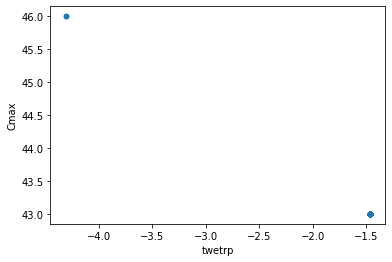

In [ ]:
l=[] # previous couple (operation,machine) to reschrdule
rest_job=[] 
rest_oper_list=[]
rest_job_list=[]
event_type=int(input('Mention the type of the event : (1) for NEW JOB ARRIVAL (2) for JOB CANCELLATION (3) for MACHINE BREAKDOWN  '))

ch=chromosome_operation_machine_seq(best_list[0])
key_list=list(best_record[0])


#NEW JOB ARRIVAL
if event_type==1 :
  taj=int(input('Please input the arrival time of this new job: '))
  priority_res=int(input('Please input the priority of this new job: (in [0.1;0.5]'))
  duedate_res=int(input('Please input the duedate of this new job:  '))
  pt_resch=pd.read_excel('/content/sample_data/exemple.xlsx',sheet_name="Job arrival",index_col =[0])
  pt_res=[list(map(int, pt_resch.iloc[i])) for i in range(len(pt_resch.axes[0]))]
  for i in key_list:
    if best_record[0][i][0]>=taj:
      l.append(i)
  for i in range(len(key_list)):
    if key_list[i] in l:
      rest_oper_list.append(ch[0][i])
      rest_job.append(pt[ch[0][i]-1])
      rest_job_list.append(job(ch[0][i])+1)
  for i in range(len(pt_res)): 
    rest_job_list.append(num_job+1)
    rest_oper_list.append(num_op+i+1)
  rest_job = rest_job + pt_res
  job_machine_res=[[] for i in range(len(rest_oper_list))]
  job_priority_duedate_res=copy.deepcopy(job_priority_duedate)
  job_priority_duedate_res.append([priority_res,duedate_res])

  for i in range(len(rest_oper_list)):
    for j in range(num_mc):
      if rest_job[i][j] != 0:
        job_machine_res[i].append(j+1)
  print(rest_oper_list)

  job_op_list_res=list(rest_job_list.count(i) for i in range(len(rest_job_list)))


  '''----- generate initial population -----'''
  best_list_res,best_obj_res,best_record_res=[],[],[]
  population_list_res=[]
  operation_seq_list_res=[]
  machine_seq_list_res=[]
  job_op_cumul_res=copy.deepcopy(job_op_cumul)
  job_op_cumul_res.append(len(pt_res)+num_op)
  
  nxm_random_num_res=copy.deepcopy(rest_oper_list)
  for i in range(population_size):
    nxm_random_num_res=random.sample(nxm_random_num_res,len(nxm_random_num_res)) # generate a random permutation of 1 to num_op
    population_list_res.append(nxm_random_num_res) # add to the population_list
    for j in range(len(nxm_random_num_res)):
      for k in range(num_job+1) :
        if population_list[i][j] <= job_op_cumul_res[k]:
           population_list[i][j]=k+1 # convert to job number format, every job appears m times
           break
        
  print(population_list_res)
  print(job_op_cumul_res)
  
  
  for n in range(num_iteration):          
    '''-------- two point crossover --------'''
    parent_list=copy.deepcopy(population_list_res)
    offspring_list=[]
    S=list(np.random.permutation(population_size)) # generate a random sequence to select the parent chromosome to crossover
    
    for m in range(int(population_size/2)):
      crossover_prob=np.random.rand()
      if crossover_rate >= crossover_prob: 
        parent_1= population_list_res[S[2*m]][:]
        parent_2= population_list_res[S[2*m+1]][:]
        child_1=parent_1[:]
        child_2=parent_2[:]
        
        cutpoint=list(np.random.choice(len(rest_oper_list), 2, replace=False))
        cutpoint.sort()
    
        child_1[cutpoint[0]:cutpoint[1]]=parent_2[cutpoint[0]:cutpoint[1]]
        child_2[cutpoint[0]:cutpoint[1]]=parent_1[cutpoint[0]:cutpoint[1]]
        
        offspring_list.extend((child_1,child_2)) # append child chromosome to offspring list
    '''----------repairment-------------'''
    for m in range(len(offspring_list)):
      job_count_res={}
      larger,less=[],[] # 'larger' record jobs appear in the chromosome more than m times, and 'less' records less than m times.
      for i in rest_oper_list:
         if i in offspring_list[m]:
            if offspring_list[m].count(i) > 1:
              offspring_list[m].remove(i)
         else:
            offspring_list[m].append(i)
        
    
    '''--------mutation--------'''   
    for m in range(len(offspring_list)):
        mutation_prob=np.random.rand()
        if mutation_rate >= mutation_prob:
            m_chg=list(np.random.choice(len(rest_oper_list), num_mutation_jobs, replace=False)) # chooses the position to mutation
            t_value_last=offspring_list[m][m_chg[0]] # save the value which is on the first mutation position
            for i in range(num_mutation_jobs-1):
                offspring_list[m][m_chg[i]]=offspring_list[m][m_chg[i+1]] # displacement
            
            offspring_list[m][m_chg[num_mutation_jobs-1]]=t_value_last # move the value of the first mutation position to the last mutation position   
                        
    
    '''--------fitness value(calculate  makespan and TWETRP)-------------'''
    total_chromosome_res=copy.deepcopy(parent_list)+copy.deepcopy(offspring_list) # combine parent and offspring chromosomes
    chroms_obj_record_res={} # record each chromosome objective values as chromosome_obj_record={chromosome:[TWET,makespan]}
    total_record_res={}
    for m in range(population_size+len(offspring_list)):
      d_record_res={}
      o_keys_res=[j for j in rest_oper_list]
      j_keys_res=[j+1 for j in range(num_job+1)]
      o_count_res={key:taj for key in o_keys_res}
      j_count_res={key:taj for key in j_keys_res}
      m_keys=[j+1 for j in range(num_mc)]
      m_count_res={key:taj for key in m_keys}
      j_record_res={}


      ch_res=chromosome_operation_machine_seq_res(total_chromosome_res[m])
      for i in range(len(total_chromosome_res[m])):

            gen_m=ch_res[1][i]         
            gen_t=ch_res[2][i]
            j_count_res[ch_res[3][i]]=j_count_res[ch_res[3][i]]+gen_t
            m_count_res[gen_m]=m_count_res[gen_m]+gen_t


            if m_count_res[gen_m]<j_count_res[ch_res[3][i]]:
                m_count_res[gen_m]=j_count_res[ch_res[3][i]]
            elif m_count_res[gen_m]>j_count_res[ch_res[3][i]]:
                j_count_res[ch_res[3][i]]=m_count_res[gen_m]

            start=j_count_res[ch_res[3][i]]-gen_t
            start_time=str(datetime.timedelta(seconds=start)) # convert seconds to hours, minutes and seconds
            end_time=str(datetime.timedelta(seconds=j_count_res[ch_res[3][i]])) 
            j_record_res[(ch_res[3][i],gen_m)] = [start,j_count_res[ch_res[3][i]]]

      total_record_res[m]=j_record_res


      for j in j_keys_res:
            if j_count_res[j]>job_priority_duedate_res[j-1][1]:
                job_tardiness=j_count_res[j]-job_priority_duedate_res[j][1]
                job_earliness=0
                d_record_res[j]=[job_earliness,job_tardiness]
            elif j_count_res[j]<job_priority_duedate_res[j-1][1]:
                job_tardiness=0
                job_earliness=job_priority_duedate_res[j-1][1]-j_count_res[j]
                d_record_res[j]=[job_earliness,job_tardiness]
            else:
                job_tardiness=0
                job_earliness=0
                d_record_res[j]=[job_earliness,job_tardiness]
      W = []
      F =[[]]
      r = []
      key_record_res=list(j_record_res)
      j_record_tot_res={}
      for i in range(num_job+1):
        for j in range(num_mc):
          if (i+1,j+1) in key_record_res:
            j_record_tot_res[(i+1,j+1)]=[j_record_res[(i+1,j+1)][0],j_record_res[(i+1,j+1)][1]]
          else:
            j_record_tot_res[(i+1,j+1)]=[0,0]

        
      for k in range(num_mc) :
            W.append(interval.union(interval(j_record_tot_res[(u+1,k+1)]) for u in range(num_job)))
            F.append([])
            r.append([])
            F[k].append([0,0])
            for i in range(m_count_res[k+1]):  
              if i in W[k] : 
                 FR=round(1-(1-F[k][i][1])*math.exp(-processing_difficulty[k]),2)
                 F[k].append([i,FR]) 
              else: 
                 RR=round(F[k][i][1]*math.exp(-recovery_rate[k]),2)
                 F[k].append([i,RR])
            r[k] = C * ((F[k][m_count_res[k+1]][1])**difficulty_rate)
    
               
      twet=sum((job_priority_duedate_res[j-1][0])*(d_record_res[j][1] + d_record_res[j][0]) for j in j_keys_res)
      priority_mean=sts.mean(job_priority_duedate_res[j-1][0] for j in j_keys_res)
      twetrp=twet + sum( (priority_mean * r[k]) for k in range(num_mc))
      makespan=max(j_count_res.values())
      chroms_obj_record_res[m]=[twetrp,makespan]                 
    
    '''-------non dominated sorting-------'''      
    front_res=non_dominated_sorting(population_size,chroms_obj_record_res)
        
    '''----------selection----------'''
    population_list_res,new_pop=selection(population_size,front_res,chroms_obj_record_res,total_chromosome_res)
    new_pop_obj_res=[chroms_obj_record_res[k] for k in new_pop] 
    new_pop_record_res=[total_record_res[k] for k in new_pop]   
    

    '''----------comparison----------'''
    if n==0:
        best_list_res=copy.deepcopy(population_list_res)
        best_obj_res=copy.deepcopy(new_pop_obj_res)
        best_record_res=copy.deepcopy(new_pop_record_res)
    else:            
          total_list_res=copy.deepcopy(population_list_res)+copy.deepcopy(best_list_res)
          total_obj_res=copy.deepcopy(new_pop_obj_res)+copy.deepcopy(best_obj_res)
          total_best_record_res=copy.deepcopy(new_pop_record_res)+copy.deepcopy(best_record_res)
        
          now_best_front_res=non_dominated_sorting(population_size,total_obj_res)
          best_list_res,best_pop_res=selection(population_size,now_best_front_res,total_obj_res,total_list_res)
          best_obj_res=[total_obj_res[k] for k in best_pop_res]
          best_record_res=[total_best_record_res[k] for k in best_pop_res]

  '''----------result----------'''
  print(best_list_res)
  print(best_obj_res)
  print(best_record_res)
 
  df = pd.DataFrame(best_obj_res,columns=['twetrp','Cmax'])
  df.plot.scatter(x='twetrp', y='Cmax')





#JOB CANCELLATION
elif event_type==2 :
  cj=int(input('Please input which job to cancelate: '))
  tcj=int(input('Please input the cancellation time of this job: '))

  for i in key_list:
    if best_record[0][i][0]>=tcj:
      l.append(i)
  for i in range(len(key_list)):
    if key_list[i] in l:
      rest_oper_list.append(ch[0][i])
      rest_job.append(pt[ch[0][i]-1])
      rest_job_list.append(job(ch[0][i])+1)

  # print(ch[0])
  # print(rest_oper_list)
  # print(    rest_job)
  # print(rest_job_list)
  ind_list=[]
  for i in range(len(rest_job_list)):
    if rest_job_list[i] == cj:
      ind_list.append(i)
  for j in ind_list:
      rest_oper_list.pop(j)
      rest_job.pop(j)
      rest_job_list.pop(j)

  
  # print(rest_oper_list)
  # print(    rest_job)
  # print(rest_job_list)

  job_machine_res=[[] for i in range(len(rest_oper_list))]
  for i in range(len(rest_oper_list)):
    for j in range(num_mc):
      if rest_job[i][j] != 0:
        job_machine_res[i].append(j+1)


  job_op_list_res=list(rest_job_list.count(i) for i in range(len(rest_job_list)))


  '''----- generate initial population -----'''
  best_list_res,best_obj_res,best_record_res=[],[],[]
  population_list_res=[]
  operation_seq_list_res=[]
  machine_seq_list_res=[]
  job_op_cumul_res=copy.deepcopy(job_op_cumul)
  
  nxm_random_num_res=copy.deepcopy(rest_oper_list)
  for i in range(population_size):
    nxm_random_num_res=random.sample(nxm_random_num_res,len(nxm_random_num_res)) # generate a random permutation of 1 to num_op
    population_list_res.append(nxm_random_num_res) # add to the population_list
    for j in range(len(nxm_random_num_res)):
      for k in range(num_job) :
        if k != cj:
          if population_list[i][j] <= job_op_cumul_res[k]:
             population_list[i][j]=k+1 # convert to job number format, every job appears m times
             break
        
  # print(population_list_res)
  # print(job_op_cumul_res)
  
  
  for n in range(num_iteration):          
    '''-------- two point crossover --------'''
    parent_list=copy.deepcopy(population_list_res)
    offspring_list=[]
    S=list(np.random.permutation(population_size)) # generate a random sequence to select the parent chromosome to crossover
    
    for m in range(int(population_size/2)):
      crossover_prob=np.random.rand()
      if crossover_rate >= crossover_prob: 
        parent_1= population_list_res[S[2*m]][:]
        parent_2= population_list_res[S[2*m+1]][:]
        child_1=parent_1[:]
        child_2=parent_2[:]
        
        cutpoint=list(np.random.choice(len(rest_oper_list), 2, replace=False))
        cutpoint.sort()
    
        child_1[cutpoint[0]:cutpoint[1]]=parent_2[cutpoint[0]:cutpoint[1]]
        child_2[cutpoint[0]:cutpoint[1]]=parent_1[cutpoint[0]:cutpoint[1]]
        
        offspring_list.extend((child_1,child_2)) # append child chromosome to offspring list
    '''----------repairment-------------'''
    for m in range(len(offspring_list)):
      job_count_res={}
      larger,less=[],[] # 'larger' record jobs appear in the chromosome more than m times, and 'less' records less than m times.
      for i in rest_oper_list:
         if i in offspring_list[m]:
            if offspring_list[m].count(i) > 1:
              offspring_list[m].remove(i)
         else:
            offspring_list[m].append(i)
        
    
    '''--------mutation--------'''
    num_mutation_jobs_res=round(mutation_selection_rate* len(rest_oper_list) ) 
    for m in range(len(offspring_list)):
        mutation_prob=np.random.rand()
        if mutation_rate >= mutation_prob:
            m_chg=list(np.random.choice(len(rest_oper_list), num_mutation_jobs_res, replace=False)) # chooses the position to mutation
            t_value_last=offspring_list[m][m_chg[0]] # save the value which is on the first mutation position
            for i in range(num_mutation_jobs_res-1):
                offspring_list[m][m_chg[i]]=offspring_list[m][m_chg[i+1]] # displacement
            
            offspring_list[m][m_chg[num_mutation_jobs_res-1]]=t_value_last # move the value of the first mutation position to the last mutation position   
                        
    
    '''--------fitness value(calculate  makespan and TWETRP)-------------'''
    total_chromosome_res=copy.deepcopy(parent_list)+copy.deepcopy(offspring_list) # combine parent and offspring chromosomes
    chroms_obj_record_res={} # record each chromosome objective values as chromosome_obj_record={chromosome:[TWET,makespan]}
    total_record_res={}
    for m in range(population_size+len(offspring_list)):
      d_record_res={}
      o_keys_res=[j for j in rest_oper_list]
      j_keys_res=[j+1 for j in range(num_job)]
      o_count_res={key:tcj for key in o_keys_res}
      j_count_res={key:tcj for key in j_keys_res}
      m_keys=[j+1 for j in range(num_mc)]
      m_count_res={key:tcj for key in m_keys}
      j_record_res={}


      ch_res=chromosome_operation_machine_seq_res(total_chromosome_res[m])
      # print(ch_res)
      for i in range(len(total_chromosome_res[m])):
            gen_m=ch_res[1][i]         
            gen_t=ch_res[2][i]
            j_count_res[ch_res[3][i]]=j_count_res[ch_res[3][i]]+gen_t
            m_count_res[gen_m]=m_count_res[gen_m]+gen_t


            if m_count_res[gen_m]<j_count_res[ch_res[3][i]]:
                m_count_res[gen_m]=j_count_res[ch_res[3][i]]
            elif m_count_res[gen_m]>j_count_res[ch_res[3][i]]:
                j_count_res[ch_res[3][i]]=m_count_res[gen_m]

            start=j_count_res[ch_res[3][i]]-gen_t
            start_time=str(datetime.timedelta(seconds=start)) # convert seconds to hours, minutes and seconds
            end_time=str(datetime.timedelta(seconds=j_count_res[ch_res[3][i]])) 
            j_record_res[(ch_res[3][i],gen_m)] = [start,j_count_res[ch_res[3][i]]]

      total_record_res[m]=j_record_res


      for j in j_keys_res:
            if j_count_res[j]>job_priority_duedate[j-1][1]:
                job_tardiness=j_count_res[j]-job_priority_duedate[j][1]
                job_earliness=0
                d_record_res[j]=[job_earliness,job_tardiness]
            elif j_count_res[j]<job_priority_duedate[j-1][1]:
                job_tardiness=0
                job_earliness=job_priority_duedate[j-1][1]-j_count_res[j]
                d_record_res[j]=[job_earliness,job_tardiness]
            else:
                job_tardiness=0
                job_earliness=0
                d_record_res[j]=[job_earliness,job_tardiness]
      W = []
      F =[[]]
      r = []
      key_record_res=list(j_record_res)
      j_record_tot_res={}
      for i in range(num_job+1):
        for j in range(num_mc):
          if (i+1,j+1) in key_record_res:
            j_record_tot_res[(i+1,j+1)]=[j_record_res[(i+1,j+1)][0],j_record_res[(i+1,j+1)][1]]
          else:
            j_record_tot_res[(i+1,j+1)]=[0,0]

        
      for k in range(num_mc) :
            W.append(interval.union(interval(j_record_tot_res[(u+1,k+1)]) for u in range(num_job)))
            F.append([])
            r.append([])
            F[k].append([0,0])
            for i in range(m_count_res[k+1]):  
              if i in W[k] : 
                 FR=round(1-(1-F[k][i][1])*math.exp(-processing_difficulty[k]),2)
                 F[k].append([i,FR]) 
              else: 
                 RR=round(F[k][i][1]*math.exp(-recovery_rate[k]),2)
                 F[k].append([i,RR])
            r[k] = C * ((F[k][m_count_res[k+1]][1])**difficulty_rate)
    
               
      twet=sum((job_priority_duedate[j-1][0])*(d_record_res[j][1] + d_record_res[j][0]) for j in j_keys_res)
      priority_mean=sts.mean(job_priority_duedate[j-1][0] for j in j_keys_res)
      twetrp=twet + sum( (priority_mean * r[k]) for k in range(num_mc))
      makespan=max(j_count_res.values())
      chroms_obj_record_res[m]=[twetrp,makespan]                 
    
    '''-------non dominated sorting-------'''      
    front_res=non_dominated_sorting(population_size,chroms_obj_record_res)
        
    '''----------selection----------'''
    population_list_res,new_pop=selection(population_size,front_res,chroms_obj_record_res,total_chromosome_res)
    new_pop_obj_res=[chroms_obj_record_res[k] for k in new_pop] 
    new_pop_record_res=[total_record_res[k] for k in new_pop]   
    

    '''----------comparison----------'''
    if n==0:
        best_list_res=copy.deepcopy(population_list_res)
        best_obj_res=copy.deepcopy(new_pop_obj_res)
        best_record_res=copy.deepcopy(new_pop_record_res)
    else:            
          total_list_res=copy.deepcopy(population_list_res)+copy.deepcopy(best_list_res)
          total_obj_res=copy.deepcopy(new_pop_obj_res)+copy.deepcopy(best_obj_res)
          total_best_record_res=copy.deepcopy(new_pop_record_res)+copy.deepcopy(best_record_res)
        
          now_best_front_res=non_dominated_sorting(population_size,total_obj_res)
          best_list_res,best_pop_res=selection(population_size,now_best_front_res,total_obj_res,total_list_res)
          best_obj_res=[total_obj_res[k] for k in best_pop_res]
          best_record_res=[total_best_record_res[k] for k in best_pop_res]

  '''----------result----------'''
  print(best_list_res)
  print(best_obj_res)
  print(best_record_res)
 
  df = pd.DataFrame(best_obj_res,columns=['twetrp','Cmax'])
  df.plot.scatter(x='twetrp', y='Cmax')



#MACHINE BREAKDOWN
elif event_type==3 :
  Nrt=5 #given positive number to judge whether it is a major or minor fault
  mb=int(input('Please input which machine is broke: '))
  tmb=int(input('Please input the time of this breakdown: '))
  frt=int(input('Please input the fault repairing time: '))
  if frt < Nrt :
    print( 'This fault is minor, No need for rescheduling.')
  else:
    print(job_machine)
    j_m_after_breakdown=copy.deepcopy(job_machine)
    ljm=len(job_machine)
    for i in range(ljm):
      if mb in j_m_after_breakdown[i]:
        j_m_after_breakdown.append(j_m_after_breakdown[i].remove(mb))
    while None in j_m_after_breakdown:
      j_m_after_breakdown.remove(None) 
    print(j_m_after_breakdown)
    for i in j_m_after_breakdown:
      if i ==[]:
        print('There is no machine to replace the broken one, we can not provide a rescheduling')
        sys.exit()
    

    for i in key_list:
      if best_record[0][i][0]>=tmb:
        l.append(i)
    for i in range(len(key_list)):
      if key_list[i] in l:
        rest_oper_list.append(ch[0][i])
        rest_job.append(pt[ch[0][i]-1])
        rest_job_list.append(job(ch[0][i])+1)
    # print(ch[0])
    # print(rest_oper_list)
    # print(    rest_job)
    # print(rest_job_list)
    job_machine_res=[[] for i in range(len(rest_oper_list))]

    for i in range(len(rest_oper_list)):
      for j in range(num_mc):
        if rest_job[i][j] != 0 and j != mb-1:
          job_machine_res[i].append(j+1)
    job_op_list_res=list(rest_job_list.count(i) for i in range(len(rest_job_list)))
    # print(job_machine_res)


    '''----- generate initial population -----'''
    best_list_res,best_obj_res,best_record_res=[],[],[]
    population_list_res=[]
    operation_seq_list_res=[]
    machine_seq_list_res=[]
    job_op_cumul_res=copy.deepcopy(job_op_cumul)
  
    nxm_random_num_res=copy.deepcopy(rest_oper_list)
    for i in range(population_size):
      nxm_random_num_res=random.sample(nxm_random_num_res,len(nxm_random_num_res)) # generate a random permutation of 1 to num_op
      population_list_res.append(nxm_random_num_res) # add to the population_list
      for j in range(len(nxm_random_num_res)):
        for k in range(num_job) :
            if population_list[i][j] <= job_op_cumul_res[k]:
               population_list[i][j]=k+1 # convert to job number format, every job appears m times
               break
        
  # print(population_list_res)
  # print(job_op_cumul_res)
  
  
    for n in range(num_iteration):          
      '''-------- two point crossover --------'''
      parent_list=copy.deepcopy(population_list_res)
      offspring_list=[]
      S=list(np.random.permutation(population_size)) # generate a random sequence to select the parent chromosome to crossover
    
      for m in range(int(population_size/2)):
        crossover_prob=np.random.rand()
        if crossover_rate >= crossover_prob: 
          parent_1= population_list_res[S[2*m]][:]
          parent_2= population_list_res[S[2*m+1]][:]
          child_1=parent_1[:]
          child_2=parent_2[:]
        
          cutpoint=list(np.random.choice(len(rest_oper_list), 2, replace=False))
          cutpoint.sort()
    
          child_1[cutpoint[0]:cutpoint[1]]=parent_2[cutpoint[0]:cutpoint[1]]
          child_2[cutpoint[0]:cutpoint[1]]=parent_1[cutpoint[0]:cutpoint[1]]
        
          offspring_list.extend((child_1,child_2)) # append child chromosome to offspring list
      '''----------repairment-------------'''
      for m in range(len(offspring_list)):
        job_count_res={}
        larger,less=[],[] # 'larger' record jobs appear in the chromosome more than m times, and 'less' records less than m times.
        for i in rest_oper_list:
           if i in offspring_list[m]:
              if offspring_list[m].count(i) > 1:
                offspring_list[m].remove(i)
           else:
             offspring_list[m].append(i)
        
    
      '''--------mutation--------'''
      num_mutation_jobs_res=round(mutation_selection_rate* len(rest_oper_list) ) 
      for m in range(len(offspring_list)):
        mutation_prob=np.random.rand()
        if mutation_rate >= mutation_prob:
            m_chg=list(np.random.choice(len(rest_oper_list), num_mutation_jobs_res, replace=False)) # chooses the position to mutation
            t_value_last=offspring_list[m][m_chg[0]] # save the value which is on the first mutation position
            for i in range(num_mutation_jobs_res-1):
                offspring_list[m][m_chg[i]]=offspring_list[m][m_chg[i+1]] # displacement
            
            offspring_list[m][m_chg[num_mutation_jobs_res-1]]=t_value_last # move the value of the first mutation position to the last mutation position   
                        
    
      '''--------fitness value(calculate  makespan and TWETRP)-------------'''
      total_chromosome_res=copy.deepcopy(parent_list)+copy.deepcopy(offspring_list) # combine parent and offspring chromosomes
      chroms_obj_record_res={} # record each chromosome objective values as chromosome_obj_record={chromosome:[TWET,makespan]}
      total_record_res={}
      for m in range(population_size+len(offspring_list)):
        d_record_res={}
        o_keys_res=[j for j in rest_oper_list]
        j_keys_res=[j+1 for j in range(num_job)]
        o_count_res={key:tmb for key in o_keys_res}
        j_count_res={key:tmb for key in j_keys_res}
        m_keys=[j+1 for j in range(num_mc)]
        # m_keys.remove(mb)
        m_count_res={key:tmb for key in m_keys}
        j_record_res={}


        ch_res=chromosome_operation_machine_seq_res(total_chromosome_res[m])
        # print(ch_res)
        for i in range(len(total_chromosome_res[m])):
            gen_m=ch_res[1][i]         
            gen_t=ch_res[2][i]
            j_count_res[ch_res[3][i]]=j_count_res[ch_res[3][i]]+gen_t
            m_count_res[gen_m]=m_count_res[gen_m]+gen_t


            if m_count_res[gen_m]<j_count_res[ch_res[3][i]]:
                m_count_res[gen_m]=j_count_res[ch_res[3][i]]
            elif m_count_res[gen_m]>j_count_res[ch_res[3][i]]:
                j_count_res[ch_res[3][i]]=m_count_res[gen_m]

            start=j_count_res[ch_res[3][i]]-gen_t
            start_time=str(datetime.timedelta(seconds=start)) # convert seconds to hours, minutes and seconds
            end_time=str(datetime.timedelta(seconds=j_count_res[ch_res[3][i]])) 
            j_record_res[(ch_res[3][i],gen_m)] = [start,j_count_res[ch_res[3][i]]]

        total_record_res[m]=j_record_res


        for j in j_keys_res:
            if j_count_res[j]>job_priority_duedate[j-1][1]:
                job_tardiness=j_count_res[j]-job_priority_duedate[j][1]
                job_earliness=0
                d_record_res[j]=[job_earliness,job_tardiness]
            elif j_count_res[j]<job_priority_duedate[j-1][1]:
                job_tardiness=0
                job_earliness=job_priority_duedate[j-1][1]-j_count_res[j]
                d_record_res[j]=[job_earliness,job_tardiness]
            else:
                job_tardiness=0
                job_earliness=0
                d_record_res[j]=[job_earliness,job_tardiness]
        W = []
        F =[[]]
        r = []
        key_record_res=list(j_record_res)
        j_record_tot_res={}
        for i in range(num_job+1):
         for j in range(num_mc):
          if (i+1,j+1) in key_record_res:
            j_record_tot_res[(i+1,j+1)]=[j_record_res[(i+1,j+1)][0],j_record_res[(i+1,j+1)][1]]
          else:
            j_record_tot_res[(i+1,j+1)]=[0,0]

        
        for k in range(num_mc) :
            W.append(interval.union(interval(j_record_tot_res[(u+1,k+1)]) for u in range(num_job)))
            F.append([])
            r.append([])
            F[k].append([0,0])
            for i in range(m_count_res[k+1]):  
              if i in W[k] : 
                 FR=round(1-(1-F[k][i][1])*math.exp(-processing_difficulty[k]),2)
                 F[k].append([i,FR]) 
              else: 
                 RR=round(F[k][i][1]*math.exp(-recovery_rate[k]),2)
                 F[k].append([i,RR])
            r[k] = C * ((F[k][m_count_res[k+1]][1])**difficulty_rate)
    
               
        twet=sum((job_priority_duedate[j-1][0])*(d_record_res[j][1] + d_record_res[j][0]) for j in j_keys_res)
        priority_mean=sts.mean(job_priority_duedate[j-1][0] for j in j_keys_res)
        twetrp=twet + sum( (priority_mean * r[k]) for k in range(num_mc))
        makespan=max(j_count_res.values())
        chroms_obj_record_res[m]=[twetrp,makespan]                 
    
      '''-------non dominated sorting-------'''      
      front_res=non_dominated_sorting(population_size,chroms_obj_record_res)
        
      '''----------selection----------'''
      population_list_res,new_pop=selection(population_size,front_res,chroms_obj_record_res,total_chromosome_res)
      new_pop_obj_res=[chroms_obj_record_res[k] for k in new_pop] 
      new_pop_record_res=[total_record_res[k] for k in new_pop]   
    

      '''----------comparison----------'''
      if n==0:
        best_list_res=copy.deepcopy(population_list_res)
        best_obj_res=copy.deepcopy(new_pop_obj_res)
        best_record_res=copy.deepcopy(new_pop_record_res)
      else:            
          total_list_res=copy.deepcopy(population_list_res)+copy.deepcopy(best_list_res)
          total_obj_res=copy.deepcopy(new_pop_obj_res)+copy.deepcopy(best_obj_res)
          total_best_record_res=copy.deepcopy(new_pop_record_res)+copy.deepcopy(best_record_res)
        
          now_best_front_res=non_dominated_sorting(population_size,total_obj_res)
          best_list_res,best_pop_res=selection(population_size,now_best_front_res,total_obj_res,total_list_res)
          best_obj_res=[total_obj_res[k] for k in best_pop_res]
          best_record_res=[total_best_record_res[k] for k in best_pop_res]

    '''----------result----------'''
    print(best_list_res)
    print(best_obj_res)
    print(best_record_res)
 
    df = pd.DataFrame(best_obj_res,columns=['twetrp','Cmax'])
    df.plot.scatter(x='twetrp', y='Cmax')

Please input the chosen solution for rescheduling: 0
[(2, 4), (1, 4), (3, 4), (4, 5), (4, 4), (3, 5)]
[6, 3, 7, 10, 11, 8]
{(2, 4): [12, 20], (1, 4): [20, 26], (3, 4): [26, 35], (4, 5): [12, 17], (4, 4): [35, 43], (3, 5): [35, 41]}
{(1, 1): [0, 0], (1, 2): [0, 0], (1, 3): [0, 0], (1, 4): [20, 26], (1, 5): [0, 0], (2, 1): [0, 0], (2, 2): [0, 0], (2, 3): [0, 0], (2, 4): [12, 20], (2, 5): [0, 0], (3, 1): [0, 0], (3, 2): [0, 0], (3, 3): [0, 0], (3, 4): [26, 35], (3, 5): [35, 41], (4, 1): [0, 0], (4, 2): [0, 0], (4, 3): [0, 0], (4, 4): [35, 43], (4, 5): [12, 17], (5, 1): [0, 0], (5, 2): [0, 0], (5, 3): [0, 0], (5, 4): [0, 0], (5, 5): [0, 0]}
43


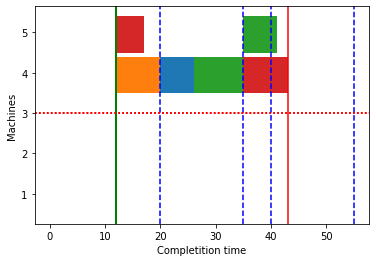

In [ ]:
sol_res = int(input('Please input the chosen solution for rescheduling: '))


# Declaring a figure "gnt"
fig_res, gnt_res = plt.subplots()
 
# Setting labels for x-axis and y-axis
gnt_res.set_xlabel('Completition time')
gnt_res.set_ylabel('Machines')
 
# Setting ticks on y-axis
gnt_res.set_yticks([10*(i+1)+5 for i in range(50)])
# Labelling tickes of y-axis
gnt_res.set_yticklabels([str(a+1) for a in range(50)])

JR_res=best_record_res[sol_res]
key_record_res=list(JR_res)
print(key_record_res)
j_record_tot_res={}
for i in range(num_job+1):
  for j in range(num_mc):
    if (i+1,j+1) in key_record_res:
      j_record_tot_res[(i+1,j+1)]=JR_res[(i+1,j+1)]
    else:
      j_record_tot_res[(i+1,j+1)]=[0,0]

    # print(j_record_tot)
    '''i = job \\ gen_m = machine '''
    
    gnt_res.broken_barh([(j_record_tot_res[(i+1,j+1)][0], j_record_tot_res[(i+1,j+1)][1]-j_record_tot_res[(i+1,j+1)][0])], (10*(j+1),9), facecolors =(color_list[i]),data='Job 1')
print(best_list_res[sol_res])
print(JR_res)
print(j_record_tot_res)
plt.savefig("gantt_res.png")
# plt.figlegend(['Job %d'%(i+1) for i in range(num_job)],loc='up')
#plt.legend(['Job %d'%(i+1) for i in range(num_job)])
plt.axvline(x=best_obj_res[sol_res][1],color='red')
# plt.axvline(x=taj,color='green')
record_res = []
'''----record represent Ci----'''
if event_type==1 :
  for i in range(num_job+1):
    plt.axvline(x=job_priority_duedate_res[i][1],color='blue',linestyle='--')
    plt.axvline(x=taj,color='green')
    cjob_res=max(j_record_tot_res[(i+1,j+1)][1] for j in range(num_mc))
    record_res.append([i+1, cjob_res -job_priority_duedate_res[i][1]])
elif event_type==2:
  for i in range(num_job):
    plt.axvline(x=job_priority_duedate[i][1],color='blue',linestyle='--')
    plt.axvline(x=tcj,color='green')
    #plt.axvline(x=j_count_res[i+1],color='red',linestyle='--')
elif event_type==3:
  for i in range(num_job):
    plt.axvline(x=job_priority_duedate[i][1],color='blue',linestyle='--')
    plt.axvline(x=tmb,color='green')
    plt.axhline(y=10*(mb)+5,color='red',ls=':')
    #plt.axvline(x=j_count_res[i+1],color='red',linestyle='--')

print(best_obj_res[sol_res][1])
# df1_res = pd.DataFrame(record_res,columns=['Job','Ci-duedate'])
# plt1_res = df1_res.plot.scatter(x='Job', y='Ci-duedate')
# plt1_res.axhline(y=0,color='red')

 